![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


   # **Cortex Game: Round1--Amount**

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [26]:
my_folder = "/content/drive/MyDrive/SAS"

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/SAS


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [27]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.7.15


In [28]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [29]:
!pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [30]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
#'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [31]:
%%writefile .authinfo
oda user a01114959@tec.mx password Mcrules123-

Overwriting .authinfo


Copy this file to home

In [32]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [33]:
import saspy
sas_session = saspy.SASsession(cfgfile=os.path.join(
    my_folder,"sascfg_personal.py"))
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 1463



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/SAS/sascfg_personal.py
WORK Path             = /saswork/SAS_work69A900011C3D_odaws02-usw2-2.oda.sas.com/SAS_workEA7B00011C3D_odaws02-usw2-2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 72765


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [34]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                      Friday, December  2, 2022 07:09:00 PM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                      Friday, December  2, 2022 07:09:00 PM

33         


## START


In [35]:
data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data_td2 = sas_session.sasdata2dataframe(
table='target_rd2',
libref='cortex'
)

In [36]:
data_merge2 = pd.merge(data1, data_td2, on=["ID"],how="right")
data_merge2 = data_merge2.loc[(data_merge2['GaveThisYear'] == 1)]

data_merge2[['MinGift', 'Frequency','TotalGift','MaxGift']] = data_merge2[['MinGift', 'Frequency','TotalGift','MaxGift']].fillna(value=0)
data_merge2[['Recency','Seniority']] = data_merge2[['Recency','Seniority']].fillna(value=10)

data_merge2.corr()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
ID,1.000000,-0.004276,-0.008712,-0.004636,0.003979,0.005697,0.001076,-0.003158,0.003361,-0.001960,0.000336,-0.002909,0.000276,0.000409,-0.001091,-0.003065,NaN,-0.000189
Woman,-0.004276,1.000000,0.032079,-0.054439,0.001698,-0.004229,-0.007491,0.013534,-0.011461,0.011514,0.039423,0.019223,0.039461,-0.011307,0.016610,0.095114,NaN,0.043386
Age,-0.008712,0.032079,1.000000,0.031511,-0.002698,0.011257,0.008921,-0.011151,0.012012,-0.008089,-0.033188,-0.018302,-0.033824,0.011648,-0.016480,-0.094376,NaN,-0.038916
Salary,-0.004636,-0.054439,0.031511,1.000000,-0.006253,0.002903,0.004151,-0.007022,0.007283,-0.004526,0.059340,0.030983,0.057719,0.009253,0.031044,-0.039594,NaN,0.067602
SeniorList,0.003979,0.001698,-0.002698,-0.006253,1.000000,0.524657,0.488871,-0.422422,0.526608,-0.218919,0.178189,0.067948,0.140924,0.006976,0.003274,-0.087352,NaN,0.004176
NbActivities,0.005697,-0.004229,0.011257,0.002903,0.524657,1.000000,0.590529,-0.457680,0.636571,-0.207526,0.220759,0.046283,0.165257,0.175988,0.045125,-0.129571,NaN,0.016713
Referrals,0.001076,-0.007491,0.008921,0.004151,0.488871,0.590529,1.000000,-0.426159,0.591733,-0.193516,0.203751,0.042802,0.152905,0.162628,0.039388,-0.121569,NaN,0.014993
Recency,-0.003158,0.013534,-0.011151,-0.007022,-0.422422,-0.457680,-0.426159,1.000000,-0.767812,0.868188,-0.267863,-0.169364,-0.226158,-0.144498,-0.036033,0.156456,NaN,-0.013498
Frequency,0.003361,-0.011461,0.012012,0.007283,0.526608,0.636571,0.591733,-0.767812,1.000000,-0.407418,0.349846,0.068588,0.262133,0.174019,0.042991,-0.137044,NaN,0.015772
Seniority,-0.001960,0.011514,-0.008089,-0.004526,-0.218919,-0.207526,-0.193516,0.868188,-0.407418,1.000000,-0.140914,-0.205013,-0.141068,-0.090326,-0.021783,0.120902,NaN,-0.006971


In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_merge2, test_size=0.15,random_state=42)

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor

X_train = train[['Age', 'Salary','Contact','MinGift', 'GaveLastYear','AmtLastYear','Woman', 'NbActivities', 'Recency', 'Frequency','Seniority','TotalGift','MaxGift' ]] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary','Contact','MinGift', 'GaveLastYear','AmtLastYear','Woman', 'NbActivities', 'Recency', 'Frequency','Seniority','TotalGift','MaxGift']] 
Y_valid = validation['AmtThisYear']

DT_model = RandomForestRegressor(max_depth=4)
DT_model.fit(X_train,Y_train)

RandomForestRegressor(max_depth=4)

In [38]:
DT_predictTrain = DT_model.predict(X_train)
DT_predict = DT_model.predict(X_valid)

print("Validation:",metrics.mean_absolute_error(Y_valid,DT_predict))
print("Train:",metrics.mean_absolute_error(Y_train,DT_predictTrain))
print(metrics.mean_squared_error(Y_valid,DT_predict))
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict)))

Validation: 62.46536555492047
Train: 63.15065776199149
50535.77835243743
224.80164223696727


In [39]:
data3 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score_rd2_contact',
libref='cortex'
)
data5 = sas_session.sasdata2dataframe(
table='score_rd2_nocontact',
libref='cortex'
)

In [40]:
scoring_data_contact = pd.merge(data3, data4, on=["ID"],how="right")
scoring_data_contact[['MinGift' , 'Frequency','TotalGift','MaxGift']] = scoring_data_contact[['MinGift', 'Frequency','TotalGift','MaxGift']].fillna(value=0)
scoring_data_contact[['Recency','Seniority']] = scoring_data_contact[['Recency','Seniority']].fillna(value=10)

X = scoring_data_contact[['Age', 'Salary','Contact','MinGift', 'GaveLastYear','AmtLastYear','Woman', 'NbActivities', 'Recency', 'Frequency','Seniority','TotalGift','MaxGift' ]] 
X.isna().sum()
DT_predict_contact = DT_model.predict(X)

scoring_data_contact['Prediction'] = DT_predict_contact

scoring_data_contact= scoring_data_contact[['ID','Prediction']]
scoring_data_contact = scoring_data_contact.rename({'Prediction': 'AmtContact'}, axis=1) 

######################################################################

scoring_data_nocontact = pd.merge(data3, data5, on=["ID"],how="right")
scoring_data_nocontact[['MinGift' , 'Frequency','TotalGift','MaxGift']] = scoring_data_nocontact[['MinGift', 'Frequency','TotalGift','MaxGift']].fillna(value=0)
scoring_data_nocontact[['Recency','Seniority']] = scoring_data_nocontact[['Recency','Seniority']].fillna(value=10)

X = scoring_data_nocontact[['Age', 'Salary','Contact','MinGift', 'GaveLastYear','AmtLastYear','Woman', 'NbActivities', 'Recency', 'Frequency','Seniority','TotalGift','MaxGift' ]] 

DT_predict_nocontact=DT_model.predict(X)

scoring_data_nocontact['Prediction'] = DT_predict_nocontact

scoring_data_nocontact= scoring_data_nocontact[['ID','Prediction']]
scoring_data_nocontact = scoring_data_nocontact.rename({'Prediction': 'AmtNoContact'}, axis=1) 

result_Amt = pd.merge(scoring_data_contact, scoring_data_nocontact, on=["ID"],how="right")
result_Amt.sort_values(by=['ID'], inplace=True)

result_Amt.to_csv('PREPFINAL_amt.csv', index=False)

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data_td2 = sas_session.sasdata2dataframe(
table='target_rd2',
libref='cortex'
)

In [42]:
data_merge = pd.merge(data1, data_td2, on=["ID"],how="right")
data_merge[['MinGift', 'Frequency','TotalGift','MaxGift']] = data_merge[['MinGift', 'Frequency','TotalGift','MaxGift']].fillna(value=0)
data_merge[['Recency', 'Seniority']] = data_merge[['Recency', 'Seniority']].fillna(value=10)
data_merge.isna().sum()

ID               0
LastName        23
FirstName        4
Woman            0
Age              0
Salary           0
Education        0
City             0
SeniorList       0
NbActivities     0
Referrals        0
Recency          0
Frequency        0
Seniority        0
TotalGift        0
MinGift          0
MaxGift          0
GaveLastYear     0
AmtLastYear      0
Contact          0
GaveThisYear     0
AmtThisYear      0
dtype: int64

[0.07890818 0.07884104 0.07896362 ... 0.57640241 0.1618566  0.17400022]
[[125904   1543]
 [ 19973   2580]]
0.85656
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92    127447
         1.0       0.63      0.11      0.19     22553

    accuracy                           0.86    150000
   macro avg       0.74      0.55      0.56    150000
weighted avg       0.83      0.86      0.81    150000



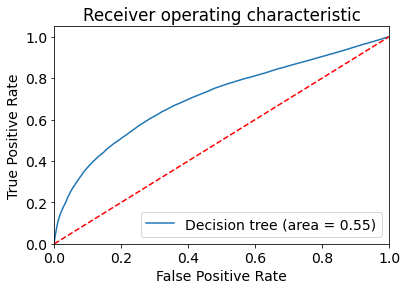

In [43]:

train, validation = train_test_split(data_merge, test_size=0.15, random_state=42) 

X_train = train[['Age','Salary','MinGift','GaveLastYear','Contact','Woman', 'NbActivities', 'Recency', 'Frequency','Seniority','TotalGift','MaxGift']] 
Y_train = train['GaveThisYear']
X_valid = validation[['Age','Salary','MinGift','GaveLastYear','Contact','Woman', 'NbActivities', 'Recency', 'Frequency','Seniority','TotalGift','MaxGift']] 
Y_valid = validation['GaveThisYear']

DT_model = DecisionTreeClassifier(max_depth=4).fit(X_train,Y_train)
DT_predict_proba = DT_model.predict_proba(X_valid) #Predictions on Testing data
DT_predict = DT_model.predict(X_valid) #Predictions on Testing data
# Probabilities for each class
DT_probs = DT_model.predict_proba(X_valid)[:, 1]
print(DT_probs)

import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix = confusion_matrix(Y_valid, DT_predict)
print(confusion_matrix)
print(accuracy_score(Y_valid, DT_predict))

from sklearn.metrics import classification_report
print(classification_report(Y_valid, DT_predict))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

DT_roc_auc = roc_auc_score(Y_valid, DT_model.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, DT_model.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision tree (area = %0.2f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()


In [44]:
data3 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score_rd2_contact',
libref='cortex'
)
data5 = sas_session.sasdata2dataframe(
table='SCORE_RD2_NOCONTACT',
libref='cortex'
)

In [45]:
scoring_data_contact = pd.merge(data3, data4, on=["ID"],how="right")
scoring_data_contact[['MinGift' , 'Frequency','TotalGift','MaxGift']] = scoring_data_contact[['MinGift', 'Frequency','TotalGift','MaxGift']].fillna(value=0)
scoring_data_contact[['Recency','Seniority']] = scoring_data_contact[['Recency','Seniority']].fillna(value=10)

X = scoring_data_contact[['Age','Salary','MinGift','GaveLastYear','Contact','Woman', 'NbActivities', 'Recency', 'Frequency','Seniority','TotalGift','MaxGift']] 
DT_predict_contact=DT_model.predict_proba(X)[:,1]
scoring_data_contact['Prediction_prob'] = DT_predict_contact

scoring_data_contact= scoring_data_contact[['ID','Prediction_prob']]
scoring_data_contact = scoring_data_contact.rename({'Prediction_prob': 'ProbContact'}, axis=1) 

scoring_data_nocontact = pd.merge(data3, data5, on=["ID"],how="right")
scoring_data_nocontact[['MinGift' , 'Frequency','TotalGift','MaxGift']] = scoring_data_nocontact[['MinGift', 'Frequency','TotalGift','MaxGift']].fillna(value=0)
scoring_data_nocontact[['Recency','Seniority']] = scoring_data_nocontact[['Recency','Seniority']].fillna(value=10)

X = scoring_data_nocontact[['Age','Salary','MinGift','GaveLastYear','Contact','Woman', 'NbActivities', 'Recency', 'Frequency','Seniority','TotalGift','MaxGift']] 
DT_predict_nocontact=DT_model.predict_proba(X)[:,1]
scoring_data_nocontact['Prediction_prob'] = DT_predict_nocontact

scoring_data_nocontact= scoring_data_nocontact[['ID','Prediction_prob']]
scoring_data_nocontact = scoring_data_nocontact.rename({'Prediction_prob': 'ProbNoContact'}, axis=1) 
scoring_data_nocontact.head()

result_Prob = pd.merge(scoring_data_contact, scoring_data_nocontact, on=["ID"],how="right")
result_Prob.sort_values(by=['ID'], inplace=True)
result_Prob.to_csv('PREPFINAL_prob.csv', index=False)

In [46]:
import pandas as pd

NB = 10000

probabilities = pd.read_csv("PREPFINAL_prob.csv")
amounts = pd.read_csv("PREPFINAL_amt.csv")

def Calc_Uplift(row):
    return ((row['AmtContact']*row['ProbContact']) - (row['AmtNoContact']*row['ProbNoContact']*0.2))

raw_submission = pd.merge(probabilities, amounts, on=["ID"], how="right")
raw_submission["Uplift"] = raw_submission.apply(lambda row: Calc_Uplift(row), axis=1)

In [47]:
# Sorting data by descending Uplift value
raw_submission.sort_values(by=['Uplift'], ascending=False, inplace=True)

#moreExpensiveCalls = raw_submission.loc[raw_submission['Uplift'] > 35]
moreExpensiveCalls = raw_submission.head(1850000)

In [48]:
moreExpensiveCalls.to_csv('Round2 Output final.csv', index=False)

outputOnly = moreExpensiveCalls[['ID']]

outputOnly.ID = outputOnly.ID.astype(int)
outputOnly.to_csv('FinalOutput.csv', index=False, header=False)

from google.colab import files
files.download('FinalOutput.csv')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>